**Milestone 2 Phase 2**

**American Alphabet Sign Language Model**

Abyanandi Zaintama H8 DSFT Batch 1

# Importing Library

In [1]:
# What version of Python do you have?
import sys

import pandas as pd
import numpy as np
import os
import time
import uuid
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
import tensorflow.keras
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:55:16) 
[Clang 11.1.0 ]
Pandas 1.3.2
Scikit-Learn 0.24.2
GPU is available
Init Graph Optimizer
Init Kernel


# Checking Data

In [2]:
train = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/American Sign Language/sign_mnist_train.csv')
test = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/American Sign Language/sign_mnist_test.csv')


In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
train['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [6]:
test['label'].value_counts()

4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: label, dtype: int64

In [7]:
import seaborn as sns

Text(0.5, 1.0, 'Train Label Count')

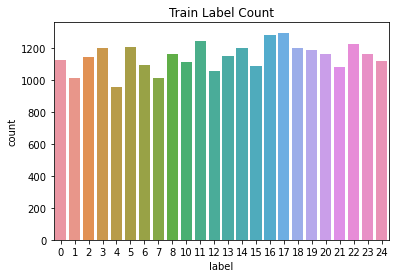

In [8]:
sns.countplot(x=train['label'])
plt.title('Train Label Count')

Text(0.5, 1.0, 'Test Label Count')

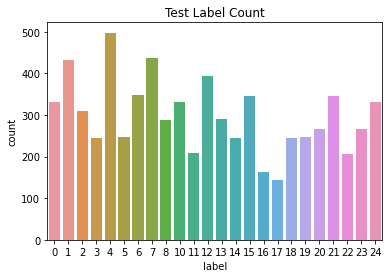

In [9]:
sns.countplot(x=test['label'])
plt.title('Test Label Count')

In [10]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [11]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Data Preprocessing

In [12]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [13]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

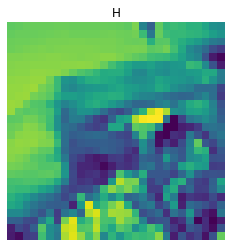

In [14]:
#See a random image for class label verification
import random
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 

plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

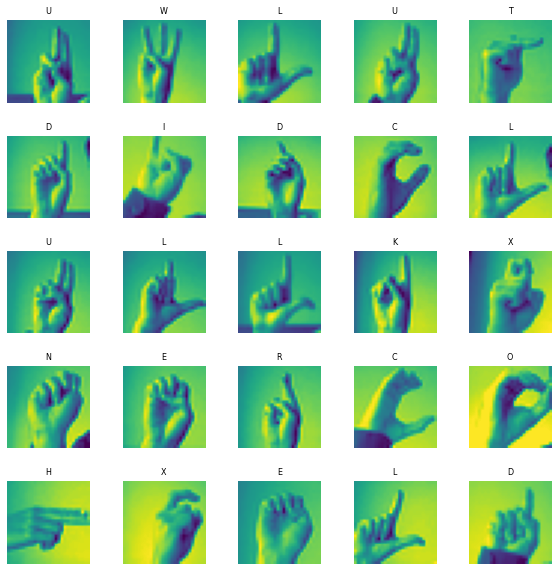

In [15]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Model Preprocessing

## Splitting Data

In [16]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

## Convert to Grayscale

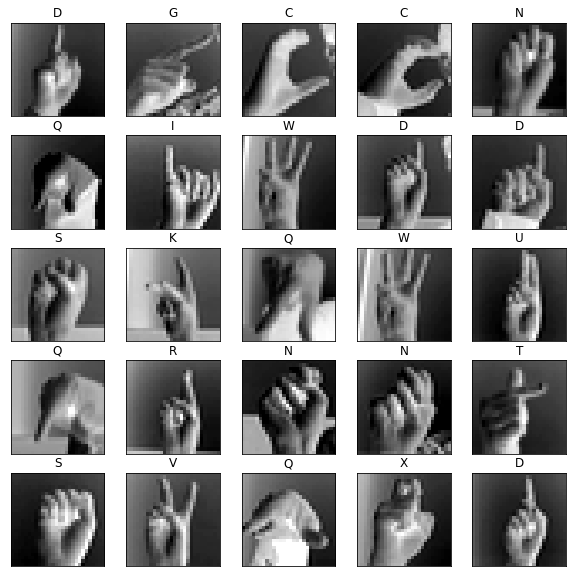

In [17]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [18]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [19]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


## Model Building

In [20]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

In [21]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

cnn_model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
______________________________________________

2021-09-07 20:03:10.196421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-07 20:03:10.196932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
#from tensorflow import keras
#keras.utils.plot_model(cnn_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Modeling

In [24]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

## Model Fitting

In [25]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 100, verbose = 1, validation_data = (X_validate, y_validate))

2021-09-07 20:16:00.479937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-07 20:16:00.488120: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2021-09-07 20:16:08.273205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 3.1918 - accuracy: 0.0502

2021-09-07 20:16:10.715380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 10s 59ms/step - loss: 3.1911 - accuracy: 0.0505 - val_loss: 3.0248 - val_accuracy: 0.1300
Epoch 2/100
43/43 [==============================] - 2s 54ms/step - loss: 2.8130 - accuracy: 0.1468 - val_loss: 2.0954 - val_accuracy: 0.3513
Epoch 3/100
43/43 [==============================] - 2s 49ms/step - loss: 2.0129 - accuracy: 0.3379 - val_loss: 1.3297 - val_accuracy: 0.5937
Epoch 4/100
43/43 [==============================] - 2s 51ms/step - loss: 1.4389 - accuracy: 0.5142 - val_loss: 0.9482 - val_accuracy: 0.7115
Epoch 5/100
43/43 [==============================] - 2s 47ms/step - loss: 1.1189 - accuracy: 0.6139 - val_loss: 0.7404 - val_accuracy: 0.7782
Epoch 6/100
43/43 [==============================] - 2s 50ms/step - loss: 0.9112 - accuracy: 0.6910 - val_loss: 0.5623 - val_accuracy: 0.8217
Epoch 7/100
43/43 [==============================] - 2s 48ms/step - loss: 0.7683 - accuracy: 0.7349 - val_loss: 0.4328 - val_accuracy: 0.8742
Epoch 8/100
43/43

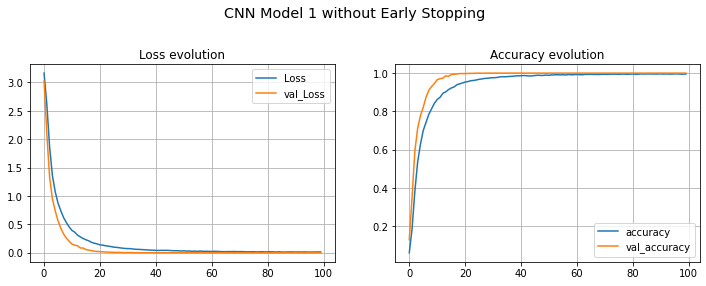

In [26]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 1 without Early Stopping", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 1 without Early Stopping.jpg')


## Predicting

In [27]:
#Predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/TensorFlow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-09-07 20:19:41.722640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


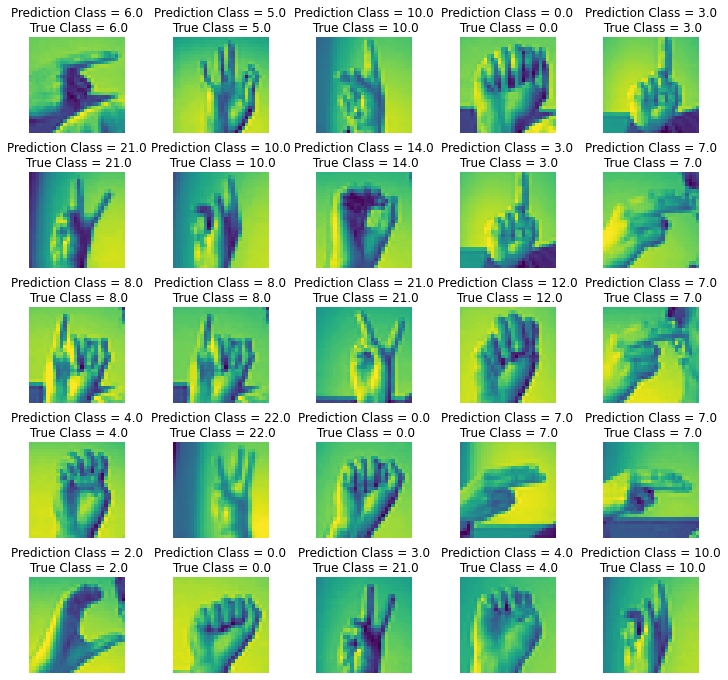

In [28]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Model Fitting with EarlyStopping

In [29]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

In [30]:
#Training the CNN model
history2 = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 100, verbose = 1, validation_data = (X_validate, y_validate),callbacks=[EarlyStopping])

Epoch 1/100
43/43 [==============================] - 2s 56ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 4.6108e-05 - val_accuracy: 1.0000
Epoch 2/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 7.3796e-05 - val_accuracy: 1.0000
Epoch 3/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 6.5893e-05 - val_accuracy: 1.0000
Epoch 4/100
43/43 [==============================] - 2s 56ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 4.4743e-05 - val_accuracy: 1.0000
Epoch 5/100
43/43 [==============================] - 2s 51ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 8.8209e-05 - val_accuracy: 1.0000
Epoch 6/100
43/43 [==============================] - 2s 47ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 2.0987e-04 - val_accuracy: 1.0000
Epoch 00006: early stopping


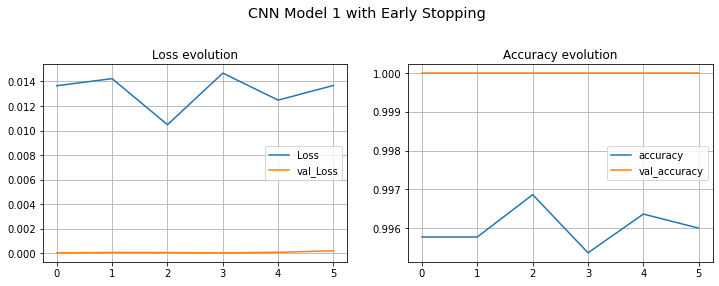

In [31]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 1 with Early Stopping", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 1 with Early Stopping.jpg')

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [33]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)


In [70]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

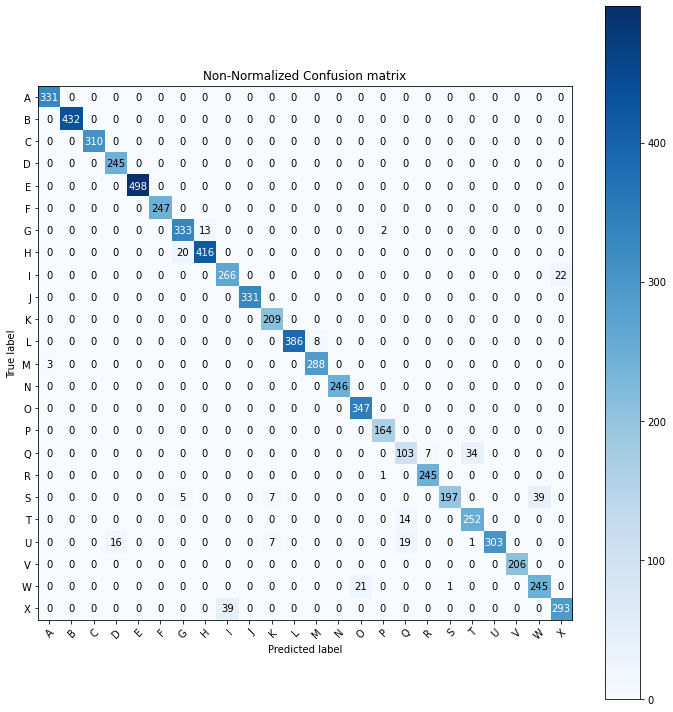

In [71]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

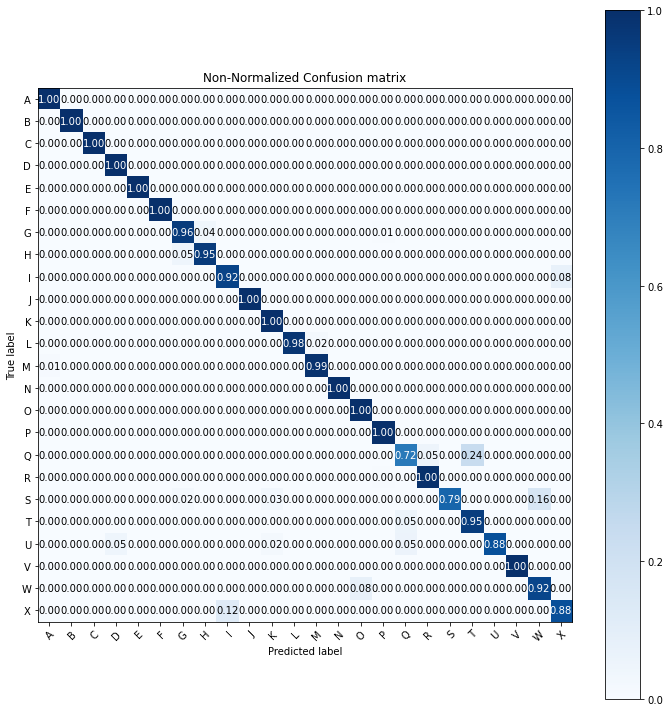

In [72]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

In [34]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [35]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9610987172336866


## Hyperparameter Tuning

In [ ]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    cnn_model2 = Sequential()

    cnn_model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model2.add(Dropout(0.25))

    cnn_model2.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model2.add(Dropout(0.25))

    cnn_model2.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model2.add(Dropout(0.25))

    cnn_model2.add(Flatten())
    cnn_model2.add(Dense(units = 512, activation = 'relu'))
    cnn_model2.add(Dropout(0.25))
    cnn_model2.add(Dense(units = 25, activation = 'softmax'))
    cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return cnn_model2

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
start= time()
model = KerasClassifier(build_fn=create_model,verbose=1)
#n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop', 'adam']
#init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([10, 20, 50])
#batches = np.array([5, 10, 20])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs)

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid)
                                   #n_iter=n_iter_search)
random_search.fit(X_train, y_train)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/homebrew/Caskroom/miniforge/base/envs/TensorFlow/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


  1/550 [..............................] - ETA: 6:17 - loss: 3.2171 - accuracy: 0.0000e+00

2021-09-06 20:39:52.634786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 39/138 [=======>......................] - ETA: 0s - loss: 1.7722 - accuracy: 0.3870

2021-09-06 20:39:58.561414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 5s - loss: 3.2129 - accuracy: 0.0241  

2021-09-06 20:39:59.766600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 38/138 [=======>......................] - ETA: 0s - loss: 1.0684 - accuracy: 0.6661

2021-09-06 20:40:05.257423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  4/550 [..............................] - ETA: 10s - loss: 3.2231 - accuracy: 0.0553 

2021-09-06 20:40:06.464955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  7/138 [>.............................] - ETA: 1s - loss: 1.0090 - accuracy: 0.6473  

2021-09-06 20:40:13.357888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/550 [..............................] - ETA: 7:31 - loss: 3.2212 - accuracy: 0.0312

2021-09-06 20:40:14.991805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 12/138 [=>............................] - ETA: 1s - loss: 1.3757 - accuracy: 0.4844

2021-09-06 20:40:21.348230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  5/550 [..............................] - ETA: 6s - loss: 3.2086 - accuracy: 0.0604  

2021-09-06 20:40:22.808949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 25/138 [====>.........................] - ETA: 0s - loss: 1.5693 - accuracy: 0.4762

2021-09-06 20:40:28.851834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 13/550 [..............................] - ETA: 4s - loss: 3.2212 - accuracy: 0.0534

2021-09-06 20:40:30.080168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 39/138 [=======>......................] - ETA: 0s - loss: 1.0566 - accuracy: 0.6218

2021-09-06 20:40:35.097379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 6s - loss: 3.2354 - accuracy: 0.0585  

2021-09-06 20:40:36.367831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 36/138 [======>.......................] - ETA: 0s - loss: 0.9232 - accuracy: 0.7005

2021-09-06 20:40:41.522112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 6s - loss: 3.2256 - accuracy: 0.0368  

2021-09-06 20:40:42.878753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 39/138 [=======>......................] - ETA: 0s - loss: 1.0672 - accuracy: 0.6627

2021-09-06 20:40:48.033437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 5s - loss: 3.2136 - accuracy: 0.0464  

2021-09-06 20:40:49.358097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 38/138 [=======>......................] - ETA: 0s - loss: 0.8909 - accuracy: 0.7179

2021-09-06 20:40:54.390520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 6s - loss: 3.2190 - accuracy: 0.0504      

2021-09-06 20:40:55.712274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 37/138 [=======>......................] - ETA: 0s - loss: 0.8118 - accuracy: 0.7264

2021-09-06 20:41:00.693862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  4/550 [..............................] - ETA: 9s - loss: 3.2240 - accuracy: 0.0345  

2021-09-06 20:41:02.021109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 24/138 [====>.........................] - ETA: 0s - loss: 1.2040 - accuracy: 0.5651

2021-09-06 20:41:07.794806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 6s - loss: 3.2198 - accuracy: 0.0280      

2021-09-06 20:41:09.018592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 37/138 [=======>......................] - ETA: 0s - loss: 1.3087 - accuracy: 0.5397

2021-09-06 20:41:15.217260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 6s - loss: 3.2156 - accuracy: 0.0317  

2021-09-06 20:41:16.585540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 40/138 [=======>......................] - ETA: 0s - loss: 1.2215 - accuracy: 0.5664

2021-09-06 20:41:22.162071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  5/550 [..............................] - ETA: 7s - loss: 3.2304 - accuracy: 0.0240  

2021-09-06 20:41:23.440906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 26/138 [====>.........................] - ETA: 0s - loss: 1.1974 - accuracy: 0.5841

2021-09-06 20:41:30.182810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  7/550 [..............................] - ETA: 5s - loss: 3.2230 - accuracy: 0.0225      

2021-09-06 20:41:31.401774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 25/138 [====>.........................] - ETA: 0s - loss: 1.1471 - accuracy: 0.6137

2021-09-06 20:41:37.349193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 13/550 [..............................] - ETA: 4s - loss: 3.2133 - accuracy: 0.0585

2021-09-06 20:41:38.531369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 42/138 [========>.....................] - ETA: 0s - loss: 0.9101 - accuracy: 0.7180

2021-09-06 20:41:43.416710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  8/550 [..............................] - ETA: 4s - loss: 3.2260 - accuracy: 0.0189      

2021-09-06 20:41:44.564860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 42/138 [========>.....................] - ETA: 0s - loss: 0.6963 - accuracy: 0.7775

2021-09-06 20:41:49.560264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 12/550 [..............................] - ETA: 5s - loss: 3.2223 - accuracy: 0.0458

2021-09-06 20:41:50.723791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 37/138 [=======>......................] - ETA: 0s - loss: 0.7481 - accuracy: 0.7627

2021-09-06 20:41:55.631710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 1s 4ms/step - loss: 0.7377 - accuracy: 0.7651


2021-09-06 20:41:56.932219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 26/138 [====>.........................] - ETA: 0s - loss: 0.8117 - accuracy: 0.7596

2021-09-06 20:42:02.411110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  7/550 [..............................] - ETA: 5s - loss: 3.2163 - accuracy: 0.0291      

2021-09-06 20:42:03.668289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 38/138 [=======>......................] - ETA: 0s - loss: 0.7893 - accuracy: 0.7516

2021-09-06 20:42:09.229773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  5/550 [..............................] - ETA: 7s - loss: 3.2146 - accuracy: 0.0296      

2021-09-06 20:42:10.557863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 18/138 [==>...........................] - ETA: 0s - loss: 1.0080 - accuracy: 0.6615

2021-09-06 20:42:16.995633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/550 [..............................] - ETA: 7:52 - loss: 3.2267 - accuracy: 0.0000e+00

2021-09-06 20:42:18.607328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 22/138 [===>..........................] - ETA: 0s - loss: 1.2154 - accuracy: 0.5611

2021-09-06 20:42:24.689251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 5s - loss: 3.2124 - accuracy: 0.0920  

2021-09-06 20:42:25.954298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 14/138 [==>...........................] - ETA: 1s - loss: 1.1890 - accuracy: 0.5804

2021-09-06 20:42:31.948062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  4/550 [..............................] - ETA: 9s - loss: 3.2296 - accuracy: 0.0273      

2021-09-06 20:42:33.308263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 32/138 [=====>........................] - ETA: 0s - loss: 1.3617 - accuracy: 0.5166

2021-09-06 20:42:39.665833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/550 [..............................] - ETA: 6:21 - loss: 3.2454 - accuracy: 0.0000e+00

2021-09-06 20:42:41.120865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 24/138 [====>.........................] - ETA: 0s - loss: 1.1199 - accuracy: 0.5898

2021-09-06 20:42:48.382489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/550 [..............................] - ETA: 8:00 - loss: 3.2129 - accuracy: 0.1250

2021-09-06 20:42:51.808734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 26/138 [====>.........................] - ETA: 0s - loss: 0.8455 - accuracy: 0.7091

2021-09-06 20:42:58.109635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/550 [..............................] - ETA: 5s - loss: 3.2219 - accuracy: 0.0509  

2021-09-06 20:42:59.609937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 14/138 [==>...........................] - ETA: 1s - loss: 0.8836 - accuracy: 0.7054

2021-09-06 20:43:06.120571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  5/550 [..............................] - ETA: 7s - loss: 3.2245 - accuracy: 0.0297   

2021-09-06 20:43:07.902632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 10/138 [=>............................] - ETA: 1s - loss: 0.8305 - accuracy: 0.7094

2021-09-06 20:43:14.128821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  3/550 [..............................] - ETA: 13s - loss: 3.2290 - accuracy: 0.0226 

2021-09-06 20:43:16.133140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 20/138 [===>..........................] - ETA: 0s - loss: 0.8545 - accuracy: 0.7156

2021-09-06 20:43:22.315813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  7/550 [..............................] - ETA: 4s - loss: 3.2039 - accuracy: 0.0301  

2021-09-06 20:43:23.692642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 14/138 [==>...........................] - ETA: 1s - loss: 0.7966 - accuracy: 0.7500

2021-09-06 20:43:30.544137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/687 [..............................] - ETA: 9:07 - loss: 3.2195 - accuracy: 0.0312

2021-09-06 20:43:32.315900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


687/687 [==============================] - 10s 13ms/step - loss: 2.7055 - accuracy: 0.1689
Best: 0.754098 using {'optimizer': 'adam', 'nb_epoch': 20}
total time: 229.63245511054993
0.550443 (0.124120) with: {'optimizer': 'rmsprop', 'nb_epoch': 10}
0.692772 (0.036944) with: {'optimizer': 'adam', 'nb_epoch': 10}
0.573167 (0.021776) with: {'optimizer': 'rmsprop', 'nb_epoch': 20}
0.754098 (0.022780) with: {'optimizer': 'adam', 'nb_epoch': 20}
0.591469 (0.043710) with: {'optimizer': 'rmsprop', 'nb_epoch': 50}
0.728876 (0.024432) with: {'optimizer': 'adam', 'nb_epoch': 50}


Best: 0.754098 using {'optimizer': 'adam', 'nb_epoch': 20}
total time: 229.63245511054993

In [37]:
tf.keras.backend.clear_session()

In [36]:
cnn_model3 = Sequential()

cnn_model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model3.add(Dropout(0.25))

cnn_model3.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model3.add(Dropout(0.25))

cnn_model3.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model3.add(Dropout(0.25))

cnn_model3.add(Flatten())
cnn_model3.add(Dense(units = 512, activation = 'relu'))
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Dense(units = 25, activation = 'softmax'))

cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
#keras.utils.plot_model(cnn_model3, "cnn_model3.jpg", show_shapes=True)

In [38]:
history3 = cnn_model3.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
 1/43 [..............................] - ETA: 28s - loss: 3.2203 - accuracy: 0.0547

2021-09-07 20:19:56.990841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 3s 53ms/step - loss: 3.1899 - accuracy: 0.0519 - val_loss: 3.0291 - val_accuracy: 0.1406


2021-09-07 20:19:59.122059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/50
43/43 [==============================] - 2s 49ms/step - loss: 2.8340 - accuracy: 0.1352 - val_loss: 2.1561 - val_accuracy: 0.3336
Epoch 3/50
43/43 [==============================] - 2s 52ms/step - loss: 2.1303 - accuracy: 0.3037 - val_loss: 1.5137 - val_accuracy: 0.5496
Epoch 4/50
43/43 [==============================] - 2s 51ms/step - loss: 1.5951 - accuracy: 0.4699 - val_loss: 1.0062 - val_accuracy: 0.6886
Epoch 5/50
43/43 [==============================] - 2s 46ms/step - loss: 1.1802 - accuracy: 0.5993 - val_loss: 0.7263 - val_accuracy: 0.7948
Epoch 6/50
43/43 [==============================] - 2s 46ms/step - loss: 0.9210 - accuracy: 0.6799 - val_loss: 0.5121 - val_accuracy: 0.8572
Epoch 7/50
43/43 [==============================] - 2s 46ms/step - loss: 0.7527 - accuracy: 0.7389 - val_loss: 0.4060 - val_accuracy: 0.8829
Epoch 8/50
43/43 [==============================] - 2s 46ms/step - loss: 0.6214 - accuracy: 0.7832 - val_loss: 0.2899 - val_accuracy: 0.9272
Epoch 9/50
43

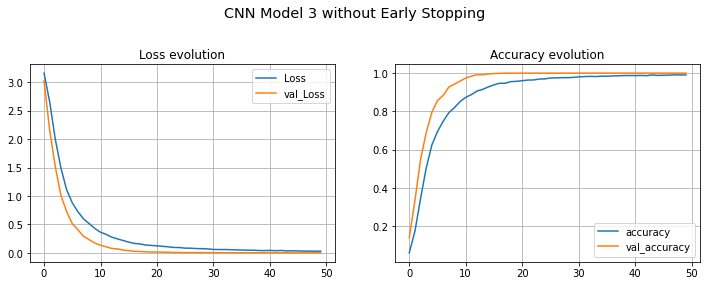

In [39]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 3 without Early Stopping", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 3 without Early Stopping.jpg')

In [40]:
tf.keras.backend.clear_session()

In [41]:
history3 = cnn_model3.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate), callbacks=EarlyStopping)

Epoch 1/50
43/43 [==============================] - 2s 46ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 6.0750e-04 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 2s 47ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 5.7674e-04 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 2s 49ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 3.7765e-04 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 2s 47ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 5.8198e-04 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 2s 46ms/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 3.0953e-04 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 2s 47ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 2.5583e-04 - val_accuracy: 1.0000
Epoch 00006: early stopping


In [42]:
cnn_model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

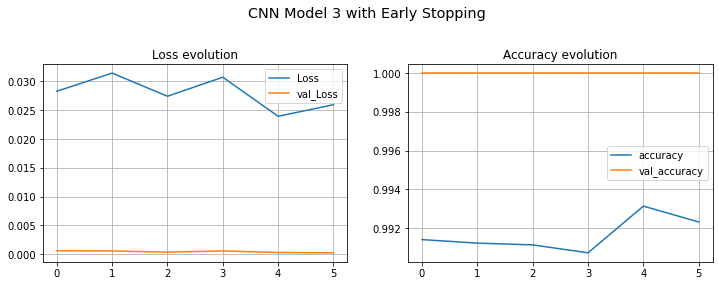

In [43]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 3 with Early Stopping", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 3 with Early Stopping.jpg')

In [44]:
#Predictions for the test data
predicted_classes3 = cnn_model3.predict_classes(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/TensorFlow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-09-07 20:21:52.063721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


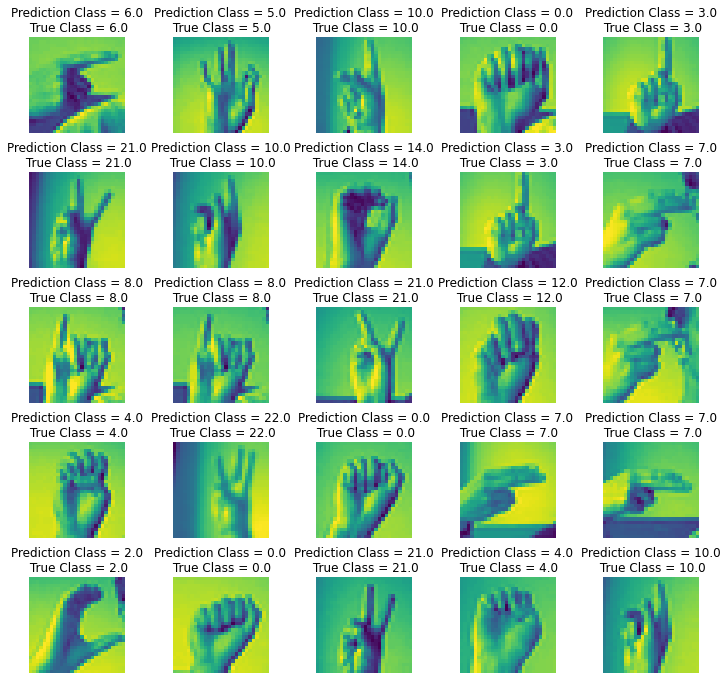

In [45]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes3[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [46]:
acc_score2 = accuracy_score(y_test, predicted_classes3)
print('Accuracy Score without randomized search = ',acc_score)
print('Accuracy Score with randomized search = ',acc_score2)

Accuracy Score without randomized search =  0.9610987172336866
Accuracy Score with randomized search =  0.9647239263803681


In [47]:
tf.keras.backend.clear_session()

In [48]:
cnn_model4 = Sequential()

cnn_model4.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model4.add(MaxPooling2D(pool_size = (2, 2),padding='same'))
cnn_model4.add(Dropout(0.4))

cnn_model4.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu',padding='same'))
cnn_model4.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model4.add(Dropout(0.4))

cnn_model4.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu',padding='same'))
cnn_model4.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model4.add(Dropout(0.4))

cnn_model4.add(Flatten())
cnn_model4.add(Dense(units = 512, activation = 'relu'))
cnn_model4.add(Dropout(0.4))
cnn_model4.add(Dense(units = 25, activation = 'softmax'))


In [49]:
cnn_model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
keras.utils.plot_model(cnn_model4, "cnn_model4.jpg", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [51]:
history4 = cnn_model4.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate), callbacks=EarlyStopping)

Epoch 1/50
 2/43 [>.............................] - ETA: 2s - loss: 3.2665 - accuracy: 0.0381 

2021-09-07 20:21:53.439665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 3.2018 - accuracy: 0.0479

2021-09-07 20:21:55.947696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 3s 63ms/step - loss: 3.2011 - accuracy: 0.0482 - val_loss: 3.1121 - val_accuracy: 0.1240
Epoch 2/50
43/43 [==============================] - 2s 58ms/step - loss: 2.7920 - accuracy: 0.1772 - val_loss: 1.8243 - val_accuracy: 0.5074
Epoch 3/50
43/43 [==============================] - 3s 59ms/step - loss: 1.6909 - accuracy: 0.4564 - val_loss: 0.8801 - val_accuracy: 0.7594
Epoch 4/50
43/43 [==============================] - 2s 57ms/step - loss: 1.0248 - accuracy: 0.6586 - val_loss: 0.4804 - val_accuracy: 0.8909
Epoch 5/50
43/43 [==============================] - 2s 58ms/step - loss: 0.6732 - accuracy: 0.7661 - val_loss: 0.2840 - val_accuracy: 0.9392
Epoch 6/50
43/43 [==============================] - 3s 60ms/step - loss: 0.4866 - accuracy: 0.8308 - val_loss: 0.1604 - val_accuracy: 0.9734
Epoch 7/50
43/43 [==============================] - 3s 66ms/step - loss: 0.3495 - accuracy: 0.8790 - val_loss: 0.1002 - val_accuracy: 0.9883
Epoch 8/50
43/43 [======

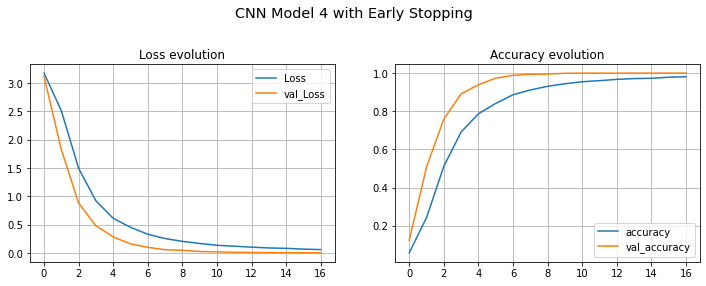

In [52]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 4 with Early Stopping", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 4 with Early Stopping.jpg')

In [53]:
cnn_model4.save('cnn-m2p2-abyanandi.h5')

In [76]:
tf.keras.backend.clear_session()

In [78]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [79]:
history5 = cnn_model4.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate), callbacks=[learning_rate_reduction])

Epoch 1/50
43/43 [==============================] - 5s 82ms/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 3s 62ms/step - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 3s 63ms/step - loss: 0.0487 - accuracy: 0.9838 - val_loss: 0.0017 - val_accuracy: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/50
43/43 [==============================] - 3s 63ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 3s 62ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0011 - val_accuracy: 1.0000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/50
43/43 [==============================] - 3s 62ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 7.8862e-04 - val_accur

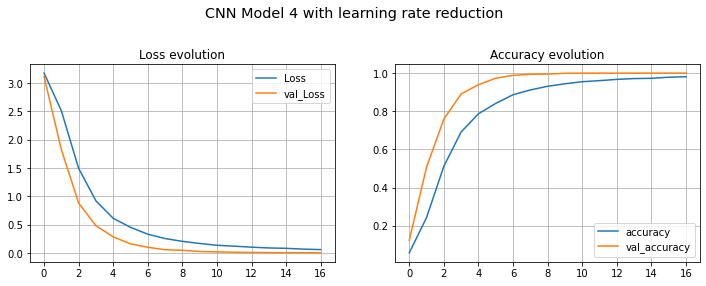

In [80]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.suptitle("CNN Model 4 with learning rate reduction", fontsize="x-large")

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.savefig('CNN Model 4 with earning rate reduction.jpg')

In [84]:
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "tes-cnn{}".format(int(time.time()))
tensorboard= TensorBoard(log_dir='logs/{}'.format(NAME))

2021-09-07 21:29:23.349640: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-09-07 21:29:23.353825: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-09-07 21:29:23.387439: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [85]:
history6 = cnn_model4.fit(X_train, y_train, batch_size = 512, epochs = 20, verbose = 1, validation_data = (X_validate, y_validate), callbacks=[learning_rate_reduction,tensorboard])

Epoch 1/20
 3/43 [=>............................] - ETA: 5s - loss: 0.0228 - accuracy: 0.9935

2021-09-07 21:30:00.994106: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-09-07 21:30:00.994124: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-09-07 21:30:01.067530: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-09-07 21:30:01.089218: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-09-07 21:30:01.114852: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/tes-cnn1631024963/train/plugins/profile/2021_09_07_21_30_01
2021-09-07 21:30:01.119106: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/tes-cnn1631024963/train/plugins/profile/2021_09_07_21_30_01/Abyanandis-MacBook-Pro.local.trace.json.gz
2021-09-07 21:30:01.135916: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/tes-cnn1631024963/tra

43/43 [==============================] - 4s 79ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 5.0965e-04 - val_accuracy: 1.0000
Epoch 2/20
43/43 [==============================] - 3s 62ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 5.0601e-04 - val_accuracy: 1.0000
Epoch 3/20
43/43 [==============================] - 3s 71ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 5.2272e-04 - val_accuracy: 1.0000
Epoch 4/20
43/43 [==============================] - 3s 64ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 5.1593e-04 - val_accuracy: 1.0000
Epoch 5/20
43/43 [==============================] - 3s 62ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 5.1015e-04 - val_accuracy: 1.0000
Epoch 6/20
43/43 [==============================] - 3s 61ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 5.1724e-04 - val_accuracy: 1.0000
Epoch 7/20
43/43 [==============================] - 3s 72ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 5.0946e-04 - val_accuracy: 1.0

zaintama@Abyanandis-MacBook-Pro RealTimeObjectDetection % tensorboard --logdir='logs'

# Model Analysis

Hyperparameter tuning with randomizedcv:
- Best: 0.754098 using {'optimizer': 'adam', 'nb_epoch': 20}
total time: 229.63245511054993
- 0.550443 (0.124120) with: {'optimizer': 'rmsprop', 'nb_epoch': 10}
- 0.692772 (0.036944) with: {'optimizer': 'adam', 'nb_epoch': 10}
- 0.573167 (0.021776) with: {'optimizer': 'rmsprop', 'nb_epoch': 20}
- 0.754098 (0.022780) with: {'optimizer': 'adam', 'nb_epoch': 20}
- 0.591469 (0.043710) with: {'optimizer': 'rmsprop', 'nb_epoch': 50}
- 0.728876 (0.024432) with: {'optimizer': 'adam', 'nb_epoch': 50}

## CNN base model (cnn model 1)

- Epoch 100/100
- 43/43 [==============================] - 2s 50ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 1.1626e-04 - val_accuracy: 1.0000

CNN model 1 with early stopping

![image](1.jpg)

CNN Model 1 without early stopping

![image](2.jpg)

## CNN Model 4

CNN Model 4 with early stopping

![image](3.jpg)

CNN model 4 without early stopping

![image](4.jpg)

CNN Model 4 with tuned dropout rate from 0.25 to 0.4

![image](5.jpg)

- Accuracy Score without randomized search =  0.9590072504182934
- Accuracy Score with randomized search =  0.9617958728388176